# Dataset is from Kaggle:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Data Preprocessing

In [29]:
df=pd.read_csv('/content/drive/MyDrive/Credit-Card/creditcard.csv')

In [30]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
df.shape

(284807, 31)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [34]:
#Correct Transactions
(df.Class==0).sum()

284315

In [35]:
#Fraud Transactions
(df.Class==1).sum()

492

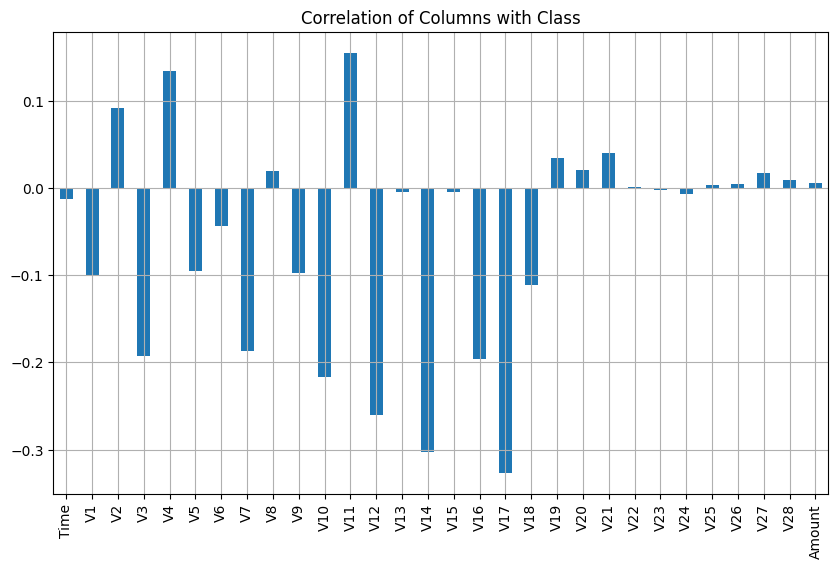

In [36]:
# Correlation
df2 = df.drop('Class', axis=1)
correlations = df2.corrwith(df['Class'])
correlations.plot.bar(
    figsize=(10, 6),
    grid=True
)
plt.title("Correlation of Columns with Class")
plt.show()



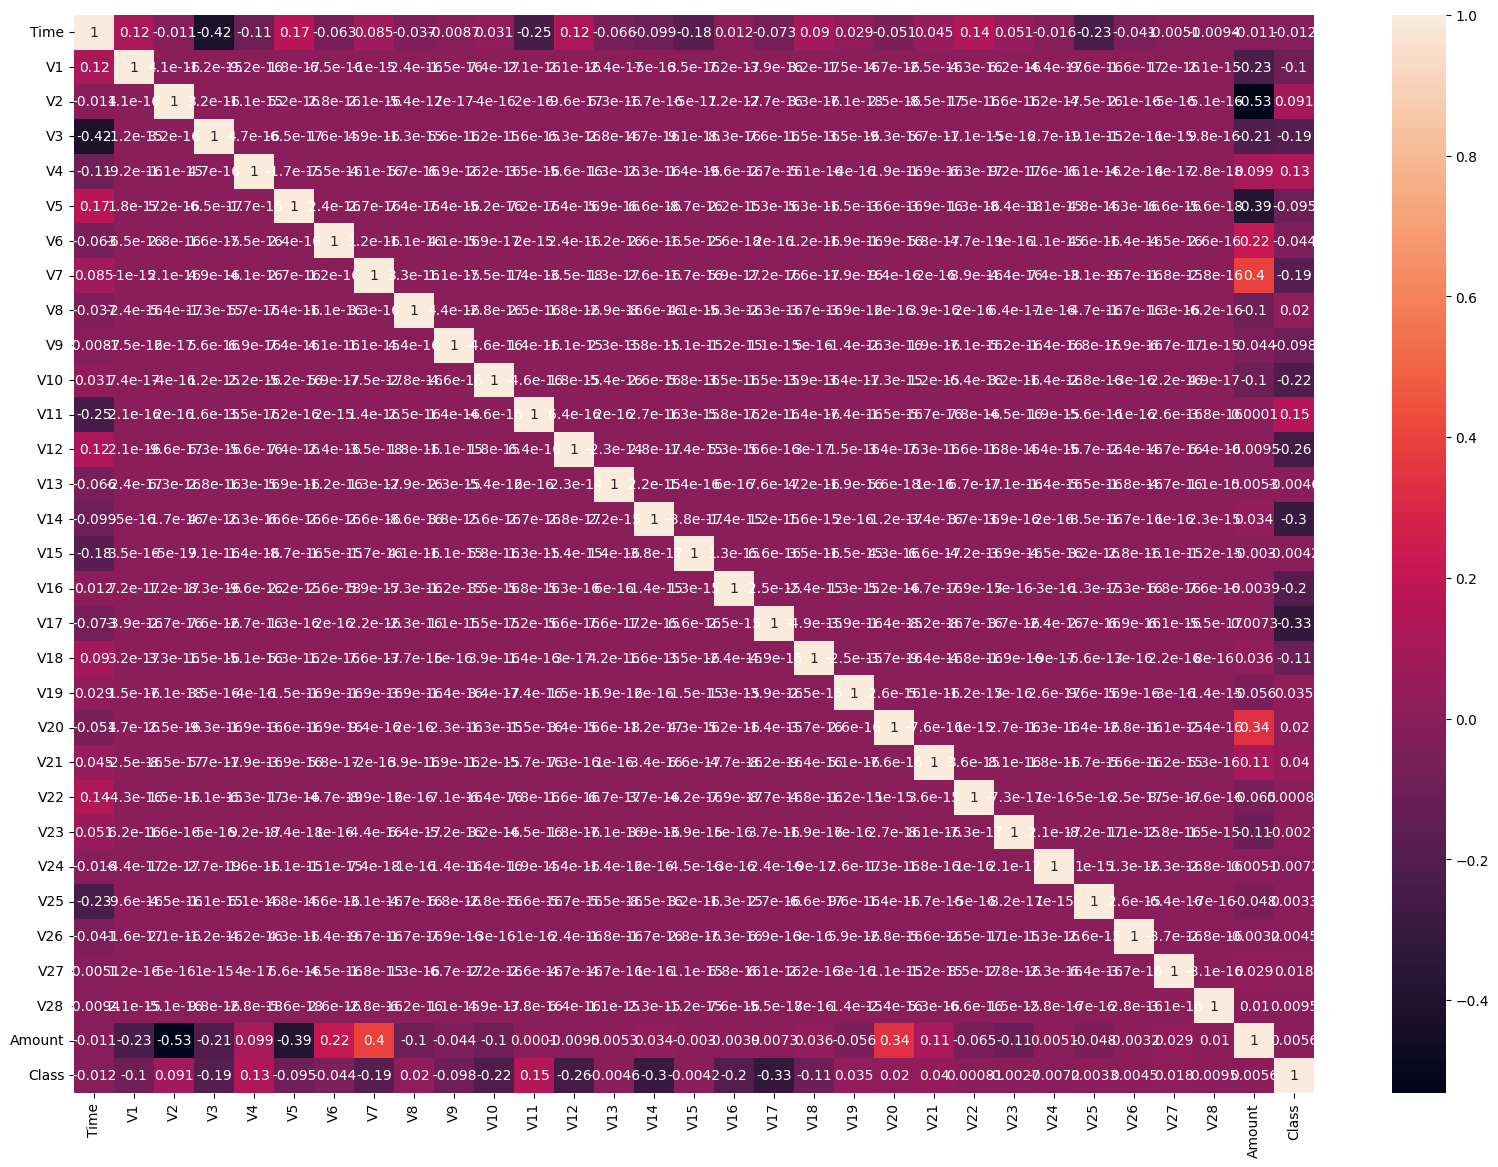

In [37]:
corr=df.corr()
plt.figure(figsize=(20,14))
ax=sns.heatmap(corr,annot=True)

# Spliting the dataset & Feature Scaling

In [38]:
X=df.drop('Class',axis=1)
y=df['Class']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Choosing The Right Model

In [41]:
model =LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [42]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9991924440855307


In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56852     9]
 [   37    64]]


In [44]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [45]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9995259997893332


In [46]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56854     7]
 [   20    81]]


In [47]:
model3=XGBClassifier()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [48]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9995435553526912


In [49]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56854     7]
 [   19    82]]


# FIneTuning

In [56]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "gamma": [0, 0.1, 0.2],
    "min_child_weight": [1, 5, 10],
    "subsample": [0.6, 0.8],
    "colsample_bytree": [0.6, 0.8]
}

In [57]:
random_search = RandomizedSearchCV(estimator=model3, param_distributions=param_distributions,
                                   n_iter=100, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7834f6db4490>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7834f6be9750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7834f63c2a40>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7834f6c66650>},
                   random_state=42, scoring='accuracy', verbose=1)

In [58]:
random_search.best_params_

{'colsample_bytree': 0.7245653237565177,
 'gamma': 0.4897552643107543,
 'learning_rate': 0.06259908096680156,
 'max_depth': 4,
 'n_estimators': 134,
 'subsample': 0.7893887083122263}

In [59]:
model3=XGBClassifier(
    colsample_bytree= 0.7245653237565177,
    gamma=0.4897552643107543,
    learning_rate= 0.06259908096680156,
    max_depth=4,
    n_estimators= 134,
    subsample= 0.7893887083122263
)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [60]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9995084442259752


In [61]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56854     7]
 [   21    80]]


In [66]:
accuracy_score = acc
accuracy_percentage = accuracy_score * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 99.95%


# I AM PROUD OF MY SELF